<a href="https://colab.research.google.com/github/gulistanburtek/machine-learning/blob/main/GIS_porject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
classes = pd.read_excel("/content/drive/MyDrive/GIS/Class.xlsx")

In [4]:
classes.shape

(9, 3)

In [5]:
classes.Samples.sum()

42776

In [6]:
classes.head(9)

,Unnamed: 0,Class,Samples
0,1,Asphalt,6631
1,2,Meadows,18649
2,3,Gravel,2099
3,4,Trees,3064
4,5,Painted metal sheets,1345
5,6,Bare Soil,5029
6,7,Bitumen,1330
7,8,Self-Blocking Bricks,3682
8,9,Shadows,947


In [7]:
from scipy.io import loadmat

PaviaU = loadmat("/content/drive/MyDrive/GIS/PaviaU.mat")
PaviaU_gt = loadmat("/content/drive/MyDrive/GIS/PaviaU_gt.mat")
data_karabuk = loadmat("/content/drive/MyDrive/GIS/Karabuk_Pavia_Data.mat")

In [8]:
print(PaviaU.keys())

dict_keys(['__header__', '__version__', '__globals__', 'paviaU'])


In [9]:
print(PaviaU_gt.keys())

dict_keys(['__header__', '__version__', '__globals__', 'paviaU_gt'])


In [10]:
print(data_karabuk.keys())

dict_keys(['__header__', '__version__', '__globals__', 'PaviaU', 'PaviaX', 'PaviaY'])


In [11]:
PaviaU["paviaU"].shape

(610, 340, 103)

In [12]:
PaviaU_gt["paviaU_gt"].shape

(610, 340)

In [13]:
data_karabuk["PaviaU"].shape

(42776, 104)

In [14]:
PaviaU_gt["paviaU_gt"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

In [15]:
data_karabuk

{'PaviaU': array([[1467, 1298, 1298, ..., 1327, 1315,    1],
        [1203, 1295, 1302, ..., 1144, 1126,    1],
        [1341, 1346, 1272, ..., 1123, 1101,    1],
        ...,
        [ 841,  785, 1107, ..., 1275, 1265,    1],
        [1507, 1731, 1581, ..., 1378, 1344,    1],
        [1416, 1114, 1397, ..., 1483, 1489,    1]], dtype=uint16),
 'PaviaX': array([[1467, 1298, 1298, ..., 1346, 1327, 1315],
        [1203, 1295, 1302, ..., 1167, 1144, 1126],
        [1341, 1346, 1272, ..., 1128, 1123, 1101],
        ...,
        [ 841,  785, 1107, ..., 1287, 1275, 1265],
        [1507, 1731, 1581, ..., 1401, 1378, 1344],
        [1416, 1114, 1397, ..., 1490, 1483, 1489]], dtype=uint16),
 'PaviaY': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 25 15:07:09 2022',
 '__version__': '1.0'}

In [16]:
data_karabuk["PaviaY"][:50].T

array([[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        3, 3, 3, 3, 3, 3]], dtype=uint8)

In [17]:
x = data_karabuk["PaviaX"]
y = data_karabuk["PaviaY"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(max_depth=20,n_estimators=200,random_state=8)
guli=clf.fit(x_train,y_train)

print(guli.score(x_train, y_train))
print(guli.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9929866746818956
0.9310371697966181


In [20]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 200)  # XGBRegressor   XGBClassifier

model=xg_reg.fit(x_train,y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
0.9474791553027352


In [21]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6815950305580604
0.6865113379568301


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [22]:
from sklearn import svm 
SVM = svm.SVC()
SVM.fit(x_train,y_train)

print(SVM.score(x_train, y_train))
print(SVM.score(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8919279965267342
0.89643886854204


In [23]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(70,70,70, ))
MLP.fit(x_train, y_train)
accuracy = MLP.score(x_test, y_test)*100.0

print(MLP.score(x_train, y_train))
print(MLP.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8634739338075678
0.8667497857087197


---------NEIGBORS--------

In [24]:
from sklearn.neighbors import RadiusNeighborsRegressor
>>> neigh = RadiusNeighborsRegressor(radius=0.5)
>>> neigh.fit(x, y)

print(neigh.score(x_train, y_train))
print(neigh.score(x_test, y_test))

1.0
1.0


In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=200, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=100).fit(x_train, y_train)
#regr.predict(x_test[:2])
regr.score(x_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-69.44293054025066

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

cf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
max_depth=110, random_state=5).fit(x_train, y_train)
cf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9050884438556845

In [27]:
predict = guli.predict(x_test)
predict

array([8, 2, 6, ..., 1, 2, 1], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
cm

array([[1869,    3,    3,    0,    1,   13,   40,   45,    0],
       [   1, 5489,    0,   34,    0,   52,    0,    0,    0],
       [  19,    0,  510,    0,    0,    1,    1,  100,    0],
       [   0,   85,    0,  860,    0,    5,    0,    0,    0],
       [   3,    0,    0,    0,  425,    0,    0,    0,    0],
       [   2,  307,    0,    0,    0, 1182,    0,    4,    0],
       [  60,    0,    1,    0,    0,    0,  333,    0,    0],
       [  34,    3,   56,    0,    0,   12,    0,  990,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  290]])

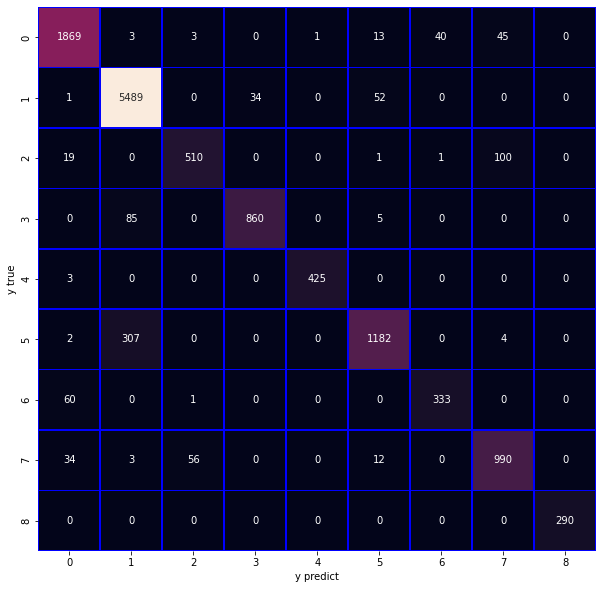

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="b",fmt=".0f",cbar=False)
plt.xlabel("y predict")
plt.ylabel("y true")
plt.show()

In [30]:
PaviaU["paviaU"].shape

(610, 340, 103)

In [31]:
Pavia_U = PaviaU["paviaU"].reshape(207400,103)

In [32]:
Pavia_U.shape

(207400, 103)

In [33]:
predict = guli.predict(Pavia_U)
predict

array([4, 4, 4, ..., 2, 2, 2], dtype=uint8)

In [34]:
predict.shape

(207400,)

In [35]:
B2_predict = predict.reshape(610,340)

In [36]:
B2_predict

array([[4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 9, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 4, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [37]:
B2_predict.shape

(610, 340)

In [38]:
# B2_predict[(PaviaU_gt["paviaU_gt"]==0)] = 0

In [39]:
B2_predict

array([[4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 9, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 4, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [40]:
np.min(B2_predict), np.max(B2_predict)

(1, 9)

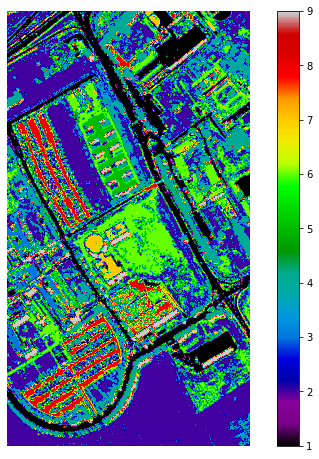

<Figure size 432x288 with 0 Axes>

In [41]:
fig=plt.figure(figsize=(10,8))
plt.imshow(B2_predict, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()
plt.savefig('Predicted_image.png')